## Logistic Regression Project 2

In this project, I will be working on titanic dataset

I'll be trying to predict a classification- survival or deceased.


## Imports

**Importing the relevant libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Data

**Read the titanic.csv file into a dataframe called titanic**

In [2]:
titanic = pd.read_csv('titanic.csv')

**Check the head of the data**

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Apply info() and describe() methods**

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

**Create countplot to plot how many people survived**

In [56]:
sns.set_palette('Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

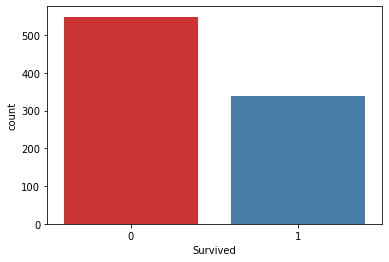

In [57]:
sns.countplot(x='Survived', data=titanic)

**Again create countplot but this time set hue as Sex**

<AxesSubplot:xlabel='Survived', ylabel='count'>

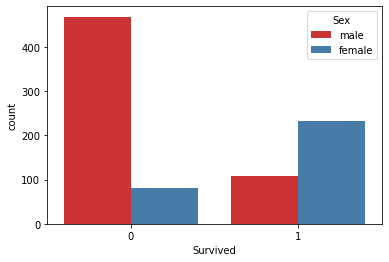

In [11]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

Clearly we can see twice as many female survived as male

**Create histogram of Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

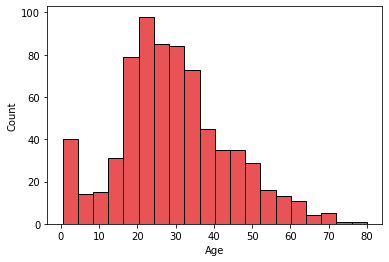

In [12]:
sns.histplot(x='Age', data=titanic)

Most of the passengers were between 20 and 40, and we can see there were quite a lot children between age 0 and 10 too

**Create countplot on SibSp (Siblings/Spouse) column** 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

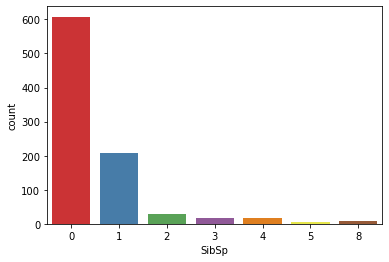

In [13]:
sns.countplot(x='SibSp', data=titanic)

Most people were traveling alone and about 100 people were traveling with a Sibling/Spouse

<AxesSubplot:xlabel='Fare', ylabel='Count'>

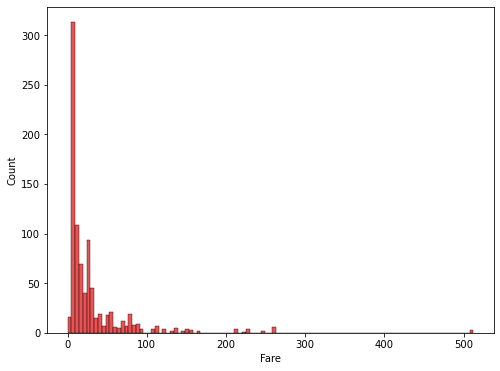

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(x='Fare', data=titanic)

Most people paid less than 40$ that means most people belonged to Pclass 3

Let's confirm this by plotting a coutplot on Pclass column

<AxesSubplot:xlabel='Pclass', ylabel='count'>

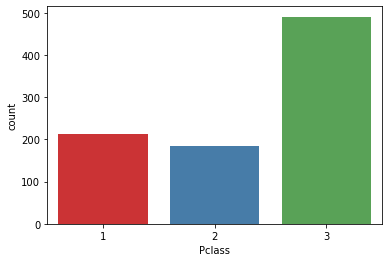

In [60]:
sns.countplot(x='Pclass', data=titanic)

## Filling Missing Values

Let's check how much data is missing

<AxesSubplot:>

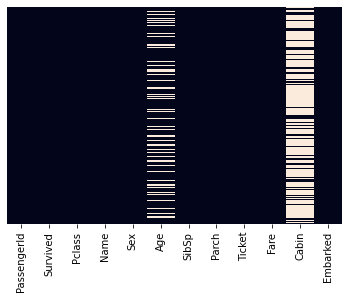

In [15]:
sns.heatmap(titanic.isnull(), cbar=False, yticklabels=False)

We are missing quite a lot of values in Cabin column, we will drop this column

And we can impute age column with the median of each Pclass

## Imputing Age

**Find median of each Pclass**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

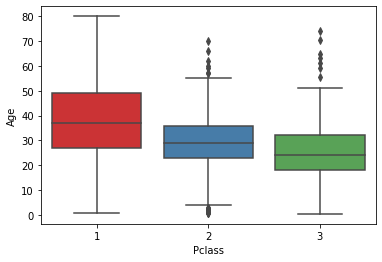

In [16]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [18]:
titanic.groupby('Pclass').median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

**Function to impute age**

In [19]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age

Applying the function on Age column

In [23]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

**Dropping Cabin column and any row having null**

In [26]:
titanic.drop(columns=['Cabin'], inplace=True)

In [27]:
titanic.dropna(axis=0, inplace=True)

**Let's check the heatmap again**

<AxesSubplot:>

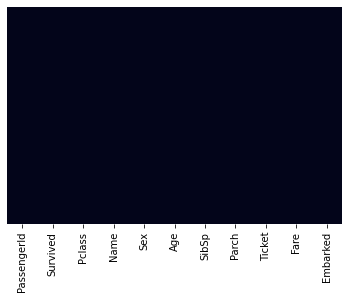

In [29]:
sns.heatmap(titanic.isnull(), cbar=False, yticklabels=False)

## Creating Dummies

**Create dummies for sex and embarked column and then drop all texual columns**

In [35]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic['Embarked'], drop_first=True)
titanic.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], inplace=True)

In [36]:
titanic = pd.concat([titanic, sex, embarked], axis=1)

**Let's check the titanic dataframe**

In [62]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Create Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X = titanic.drop(columns='Survived')
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Instantiate the model and fit it

In [46]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(max_iter=200)

In [50]:
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Create Predictions

In [51]:
predictions = lrmodel.predict(X_test)

## Evaluate the model

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[145  20]
 [ 30  72]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       165
           1       0.78      0.71      0.74       102

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



## The End